<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe. 

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [1]:
# Importing the zipfile module for working with zip files
import zipfile

# Importing the tarfile module for working with tar files
import tarfile
# Importing all neccessary modeules
import spacy 
import pandas as pd
from pathlib import Path
import sys
import re
import joblib

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
# Mount google drive if google colab is being used
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')     

Mounted at /content/drive


In [3]:
# Set base folder and append custome module paths
if 'google.colab' in str(get_ipython()):
  !pip install -U nltk -qq
  !pip install -U spacy -qq
  !python -m spacy download en_core_web_sm -qq
  base_folder = Path('/content/drive/Othercomputers/Samsung_Laptop/School/Spring_2023_Semester/BUAN_6342_Applied_Natural_Language_Processing/Datasets')
  sys.path.append('/content/drive/Othercomputers/Samsung_Laptop/School/Spring_2023_Semester/BUAN_6342_Applied_Natural_Language_Processing/Custom_Functions_py_files')
else:
    base_folder = Path('/Users/12544/Desktop/School/Spring_2023_Semester/BUAN_6342_Applied_Natural_Language_Processing/Datasets')
    sys.path.append('/Users/12544/Desktop/School/Spring_2023_Semester/BUAN_6342_Applied_Natural_Language_Processing/Custom_Functions_py_files')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 57.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-27 05:03:33.840028: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 05:03:33.840160: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dy

In [4]:
data_folder = base_folder/'datasets'
archive_folder = base_folder/'archive'
model_folder = base_folder/'models'

In [5]:
# Download spacy model
if 'google.colab' in str(get_ipython()):
    !python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-27 05:03:49.821216: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 05:03:49.821390: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 05:03:49.821422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [6]:
# Check for the downloaded Zip file containig the data is csv format
for entries in archive_folder.iterdir():
  if 'zip' in entries.name:
    print(entries.name)

trainingandtestdata.zip
COVID-19.zip
master.zip
dataverse_files.zip
archive.zip


In [7]:
# Check the files in the zip folder
file = archive_folder/'archive.zip'
with zipfile.ZipFile(file, 'r') as f:
  namelist = f.namelist()
print(namelist)

['spam.csv']


In [ ]:
# Extract the csv into the data folder
with zipfile.ZipFile(file, 'r') as f:
  f.extract('spam.csv', path = data_folder)

In [8]:
# Read csv file into a dataframe
df = pd.read_csv(data_folder/'spam.csv', encoding="ISO-8859-1")

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# Renaming the main columns needed and dropping unused columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace = True)
df = df.drop(labels=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [11]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5572, 2)

In [13]:
# Install and import the swifter module
!pip install swifter
import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=37e69f88d5a8a0bbd35e43d4e861e816a64a6d408d060bdafbc63feda76aa19f
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [14]:
# Get the percentage of spam observations to the percentage of ham
perc_of_spam = sum(df['label'].swifter.apply(lambda x: 1 if x == "spam" else 0))/len(df) * 100

Pandas Apply:   0%|          | 0/5572 [00:00<?, ?it/s]

In [15]:
print("The percentage of spam in the dataset is", perc_of_spam, "While the percentage of ham is", 100 - perc_of_spam)

The percentage of spam in the dataset is 13.406317300789663 While the percentage of ham is 86.59368269921033


# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

<font color='indian red'> I will use recall to evaluate my model. This is because recall is the proportion of true positives among all actual positives. It measures the model's ability to correctly identify positive samples. High recall means that the model is correctly identifying most of the positive samples.
<font color='indian red'>
In this case of my model spam which is the positive and the rare event, recall measures how much of spam emails I can correctly identify

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model. 

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:** 

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/). 

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.). 

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn: 

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

# <font color ='indian red'> **Pipeline1: Data Processing + Sparse Embeddings (TF-IDF) + ML Model**

In [16]:
# Import required nltk packages
import nltk
nltk.download('stopwords')  # Download the stopwords corpus
from nltk.corpus import stopwords as nltk_stopwords  # Stopwords corpus

# Import tweet tokenizer from nltk
from nltk.tokenize import TweetTokenizer

# Import CountVectorizer and TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Import the joblib library for saving and loading models
import joblib

# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix

In [18]:
import custom_preprocessor_mod as cp
from  featurizer import ManualFeatures
from  plot_learning_curve import plot_learning_curve

In [19]:
# Change the label column into ones and zeroes (1 for spam email and 0 for non-spam)
df['label'] = df['label'].swifter.apply(lambda x: 1 if x=="spam" else 0)

Pandas Apply:   0%|          | 0/5572 [00:00<?, ?it/s]

In [20]:
len(df)

5572

In [21]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# Splitting the dataset into train and test samples. 50% of the data for each
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.5, random_state=10)

# print shape of the datasets
print(f'Shape of Training data set is : {train_data.shape}')
print(f'Shape of Test data set is : {test_data.shape}')

Shape of Training data set is : (2786, 2)
Shape of Test data set is : (2786, 2)


In [23]:
# Take a small subsect(10%) of the data set for model building
train_small = train_data.sample(frac=0.4, replace=True, random_state=1)
test_small = test_data.sample(frac=0.7, replace=True, random_state=1)

In [24]:
len(train_small)

1114

In [25]:
# Check the proportion of train and test samples
train_small['label'].value_counts()

0    965
1    149
Name: label, dtype: int64

In [26]:
# Create a numpy array of the x and y training and test data
X_train = train_small['message'].values
X_test = test_small['message'].values
y_train = train_small['label'].values
y_test = test_small['label'].values

print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test: {y_test.shape}')

X_train: (1114,) y_train: (1114,)
X_test: (1950,) y_test: (1950,)


In [27]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Using the custom preprocessor that was imported earlier, clean the text data
X_train_cleaned = cp.SpacyPreprocessor(model = "en_core_web_sm").transform(X_train)
X_test_cleaned = cp.SpacyPreprocessor(model = "en_core_web_sm").transform(X_test)

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [29]:
# save this to a file
file_X_train_cleaned_sparse_embed_HW3 = data_folder / 'x_train_cleaned_sparse_embed.pkl'
joblib.dump(X_train_cleaned, file_X_train_cleaned_sparse_embed_HW3)

['/content/drive/Othercomputers/Samsung_Laptop/School/Spring_2023_Semester/BUAN_6342_Applied_Natural_Language_Processing/Datasets/datasets/x_train_cleaned_sparse_embed.pkl']

In [30]:
file_X_test_cleaned_sparse_embed_HW3 = data_folder / 'x_test_cleaned_sparse_embed.pkl'
joblib.dump(X_test_cleaned, file_X_test_cleaned_sparse_embed_HW3)

['/content/drive/Othercomputers/Samsung_Laptop/School/Spring_2023_Semester/BUAN_6342_Applied_Natural_Language_Processing/Datasets/datasets/x_test_cleaned_sparse_embed.pkl']

## <font color ='indian red'>**Pipeline 3: Data Preprocessing + Manual Features + Sparse Embeddings(TF-IDF) + ML Model**

In [67]:
# Combine text data and the manual features into one dataframe
X_train_combined = pd.concat((pd.DataFrame(X_train_cleaned_sparse_embed_HW3, columns=['cleaned text']),
                              pd.DataFrame(df_feature_train)), axis = 1)

In [68]:
df_feature_train.head()

,count_words,count_characters,count_characters_no_space,avg_word_length,count_digits,count_numbers,noun_count,aux_count,verb_count,adj_count,ner,no_of_spelling_mistakes
0,8.0,50.0,43.0,4.777778,1.0,1.0,2.0,5.0,0.0,1.0,1.0,0
1,17.0,89.0,73.0,4.055556,0.0,0.0,4.0,14.0,0.0,2.0,0.0,1
2,7.0,33.0,27.0,3.375000,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1
3,4.0,20.0,17.0,3.400000,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1
4,5.0,21.0,17.0,2.833333,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0


In [69]:
len(X_train_combined)

1114

In [70]:
X_train_combined.head()

,cleaned text,count_words,count_characters,count_characters_no_space,avg_word_length,count_digits,count_numbers,noun_count,aux_count,verb_count,adj_count,ner,no_of_spelling_mistakes
0,lemme know swing pick free basically time 1 se...,8.0,50.0,43.0,4.777778,1.0,1.0,2.0,5.0,0.0,1.0,1.0,0
1,xmas story peace xmas msg love xmas miracle je...,17.0,89.0,73.0,4.055556,0.0,0.0,4.0,14.0,0.0,2.0,0.0,1
2,aiyah ok wat long get improve wat,7.0,33.0,27.0,3.375000,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1
3,ugh fuck resubbe eve,4.0,20.0,17.0,3.400000,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1
4,eh u send wrongly lar,5.0,21.0,17.0,2.833333,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0


In [71]:
subset = X_train_combined[0:10]
subset.shape

(10, 13)

In [72]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)

In [73]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=500)), ])

In [74]:
sparse_features.fit_transform(subset.iloc[:, 1:])
vectorizer.fit_transform(subset.iloc[:, 0])

<10x88 sparse matrix of type '<class 'numpy.float64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [75]:
combined_features = ColumnTransformer(
 transformers=[
     ('tfidf', vectorizer, 'cleaned text'),
      ], remainder=sparse_features
     )

In [76]:
test = combined_features.fit_transform(subset)

In [77]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(max_iter=10000)),
                        ])

In [78]:
param_grid_classifier_3 = {'combined_features__tfidf__tfidf__max_features': [100, 500, 1000, 2000, 5000], 
                           'classifier__C': [0.1, 1, 10, 100, 100000]
                          }

In [79]:
grid_classifier_3 = GridSearchCV(estimator=classifier_3, 
                                 param_grid=param_grid_classifier_3,
                                 cv=6)
grid_classifier_3.fit(X_train_combined, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('combined_features',
                                        ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                                                     SparseTransformer())]),
                                                          transformers=[('tfidf',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer(max_features=500))]),
                                                                         'cleaned '
                                                                         'text')])),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100, 100000],
                         'combined_f

In [80]:
print("Best cross-validation score: {:.2f}".format(grid_classifier_3.best_score_))
print("\nBest parameters: ", grid_classifier_3.best_params_)
print("\nBest estimator: ", grid_classifier_3.best_estimator_)

Best cross-validation score: 0.98

Best parameters:  {'classifier__C': 100, 'combined_features__tfidf__tfidf__max_features': 1000}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=1000))]),
                                                  'cleaned text')])),
                ('classifier', LogisticRegression(C=100, max_iter=10000))])


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

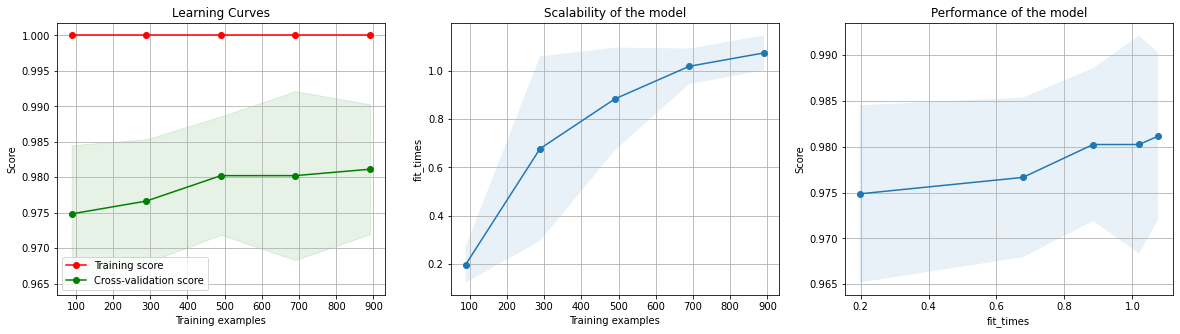

In [81]:
# plot learning curces
plot_learning_curve(grid_classifier_3.best_estimator_, 'Learning Curves',
                    X_train_combined, y_train, n_jobs=-1)

In [82]:
# let's check the train scores
print(grid_classifier_3.best_estimator_.score(X_train_combined, y_train))

# let's check the cross validation score
print(grid_classifier_3.best_score_)

1.0
0.9838419064225516


In [83]:
# Final Pipeline
def final_pipeline(text):
    X_features, feature_names = featurizer.fit_transform(text)
    df_feature_test = pd.DataFrame(X_features, columns=feature_names)
    X_test_text = pd.DataFrame(text)
    df_feature_test['no_of_spelling_mistakes'] = X_test_text.iloc[:, 0].swifter.apply(lambda x: check_spelling(x))
    X_test_combined = pd.concat((pd.DataFrame(X_test_cleaned, columns=['cleaned text']),
                                 df_feature_test), axis=1)
    predictions = grid_classifier_3.best_estimator_.predict(X_test_combined)
    return predictions

In [84]:
# predicted values for Test data set
y_test_pred = final_pipeline(X_test_cleaned)

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Pandas Apply:   0%|          | 0/1950 [00:00<?, ?it/s]

In [85]:
print('\nTest set classification report:\n\n', classification_report(y_test, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1684
           1       0.96      0.87      0.91       266

    accuracy                           0.98      1950
   macro avg       0.97      0.93      0.95      1950
weighted avg       0.98      0.98      0.98      1950



I choose Pipeline 3 as the best model